In [6]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1>PERCEPTRON</h1>

In [7]:
df = pd.read_csv("data/iris.data", header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


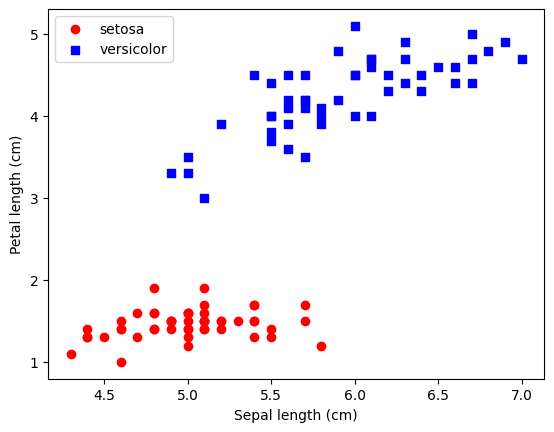

In [8]:
# EXPLORATORY DATA ANALYSIS

# Getting the first 100 data points (50 are iris-setosa and 50 are iris-versicolor), 
# extracting the class label and encoding them to 0's (setosa) and 1's (versicolor)
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)
y

# Getting sepal length and petal length of the first 100 data points. (0th column is
# sepal length and 2nd column is petal length)
X = df.iloc[0:100, [0, 2]].values

# plotting the data
plt.scatter(X[:50, 0], X[:50, 1], color = "red", marker = "o", label = "setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color = "blue", marker = "s", label = "versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend(loc = "upper left")
plt.show()

In [9]:
from Perceptron import Perceptron

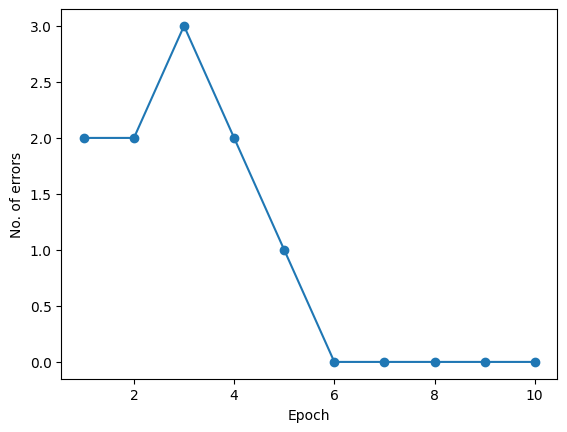

In [10]:
# initializing and fitting a perceptron
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

# plotting errors in each epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o")
plt.xlabel("Epoch")
plt.ylabel("No. of errors")
plt.show()

In [11]:
# visualization code taken from book

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

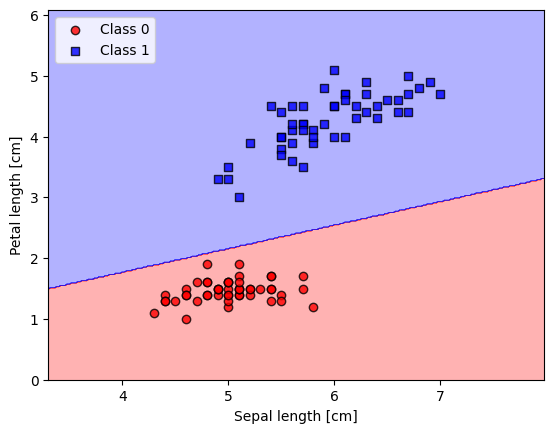

In [12]:
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<h1>ADAptive LInear NEuron — ADALINE</h1>

In [13]:
from AdalineGD import AdalineGD

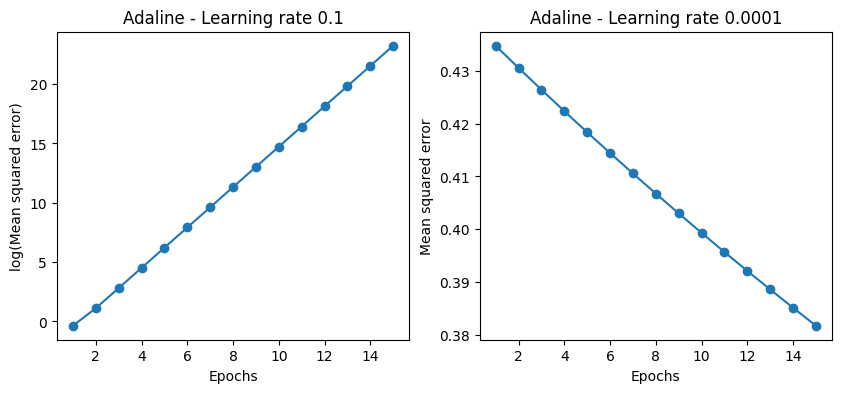

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()